In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df= pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.shape

(299, 13)

In [6]:
df. describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
#هنشيل الصفوف الي  اعلي من 400 creatinine_phosphokinase
high_cpk_values = df[df['creatinine_phosphokinase'] > 400]['creatinine_phosphokinase']

In [8]:
high_cpk_values.describe()

count     121.000000
mean     1209.396694
std      1288.052914
min       418.000000
25%       582.000000
50%       618.000000
75%      1202.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

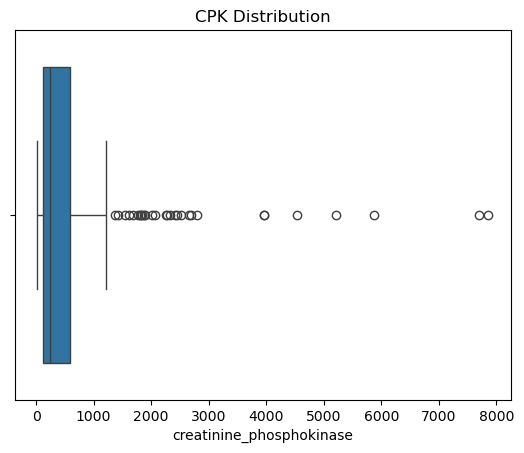

In [9]:
sns.boxplot(x=df['creatinine_phosphokinase'])
plt.title('CPK Distribution')
plt.show()

In [10]:
Q1 = df['creatinine_phosphokinase'].quantile(0.25)
Q3 = df['creatinine_phosphokinase'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['creatinine_phosphokinase'] < lower_bound) | (df['creatinine_phosphokinase'] > upper_bound)]


In [11]:
outliers.count()

age                         29
anaemia                     29
creatinine_phosphokinase    29
diabetes                    29
ejection_fraction           29
high_blood_pressure         29
platelets                   29
serum_creatinine            29
serum_sodium                29
sex                         29
smoking                     29
time                        29
DEATH_EVENT                 29
dtype: int64

In [12]:
median_val = df['creatinine_phosphokinase'].median()
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].apply(
    lambda x: median_val if x > upper_bound or x < lower_bound else x)

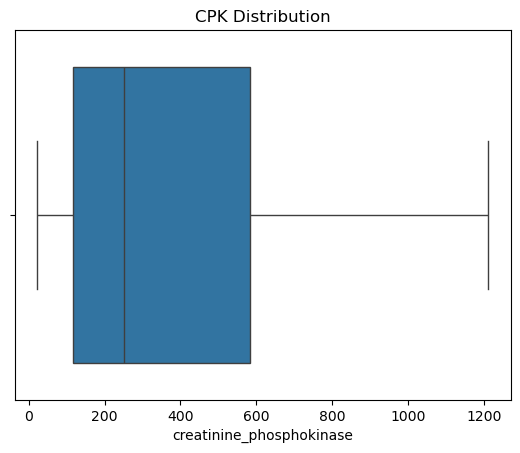

In [13]:
sns.boxplot(x=df['creatinine_phosphokinase'])
plt.title('CPK Distribution')
plt.show()

In [14]:
df. describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,324.290970,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,264.941729,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1211.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


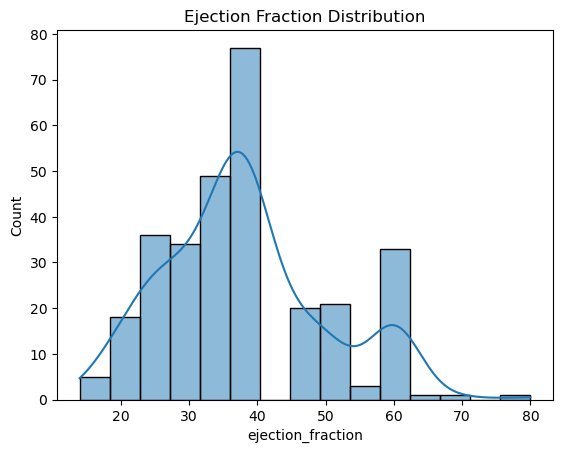

In [15]:
sns.histplot(df['ejection_fraction'], kde=True)
plt.title("Ejection Fraction Distribution")
plt.show()

In [16]:
#عملنا caping
q01 = df['ejection_fraction'].quantile(0.01)
q99 = df['ejection_fraction'].quantile(0.99)
df['ejection_fraction'] = df['ejection_fraction'].clip(lower=q01, upper=q99)

In [17]:
df['ejection_fraction'].describe()

count    299.000000
mean      38.010234
std       11.535569
min       16.960000
25%       30.000000
50%       38.000000
75%       45.000000
max       62.060000
Name: ejection_fraction, dtype: float64

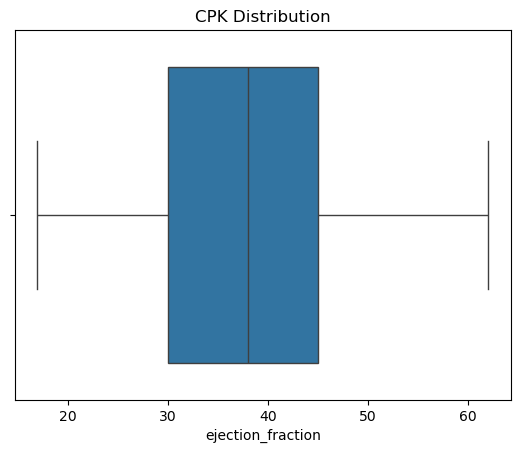

In [18]:
sns.boxplot(x=df['ejection_fraction'])
plt.title('CPK Distribution')
plt.show()

In [19]:
df['high_blood_pressure'].unique()

array([1, 0])

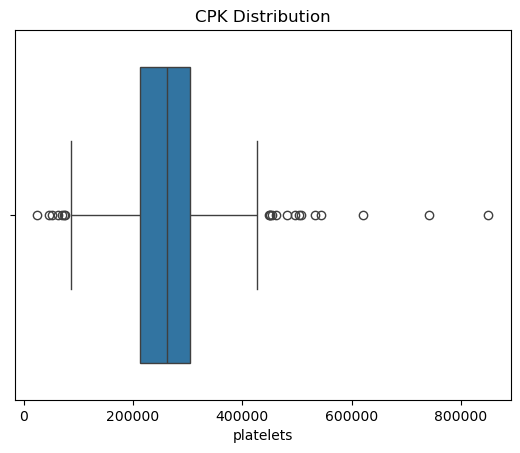

In [20]:
sns.boxplot(x=df['platelets'])
plt.title('CPK Distribution')
plt.show()

In [21]:
q01 = df['platelets'].quantile(0.01)
q99 = df['platelets'].quantile(0.99)
df['platelets'] = df['platelets'].clip(lower=q01, upper=q99)

In [22]:
df['platelets'].describe()

count       299.000000
mean     261628.664716
std       88971.971362
min       61780.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      544560.000000
Name: platelets, dtype: float64

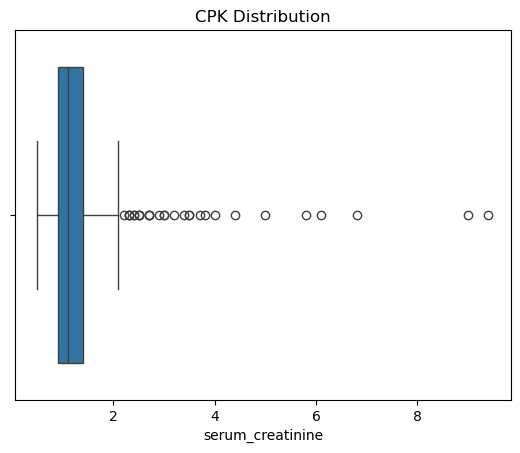

In [23]:
sns.boxplot(x=df['serum_creatinine'])
plt.title('CPK Distribution')
plt.show()

In [24]:
q3 = df['serum_creatinine'].quantile(0.75)
count_above_q3 = (df['serum_creatinine'] > q3).sum()
print(" serum_creatinine:", count_above_q3)

 serum_creatinine: 72


In [25]:
q01 = df['serum_creatinine'].quantile(0.01)
q99 = df['serum_creatinine'].quantile(0.99)
df['serum_creatinine'] = df['serum_creatinine'].clip(lower=q01, upper=q99)


In [26]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,324.290970,0.418060,38.010234,0.351171,261628.664716,1.371278,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,264.941729,0.494067,11.535569,0.478136,88971.971362,0.886632,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,16.960000,0.000000,61780.000000,0.600000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1211.000000,1.000000,62.060000,1.000000,544560.000000,6.114000,148.000000,1.000000,1.00000,285.000000,1.00000


In [27]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

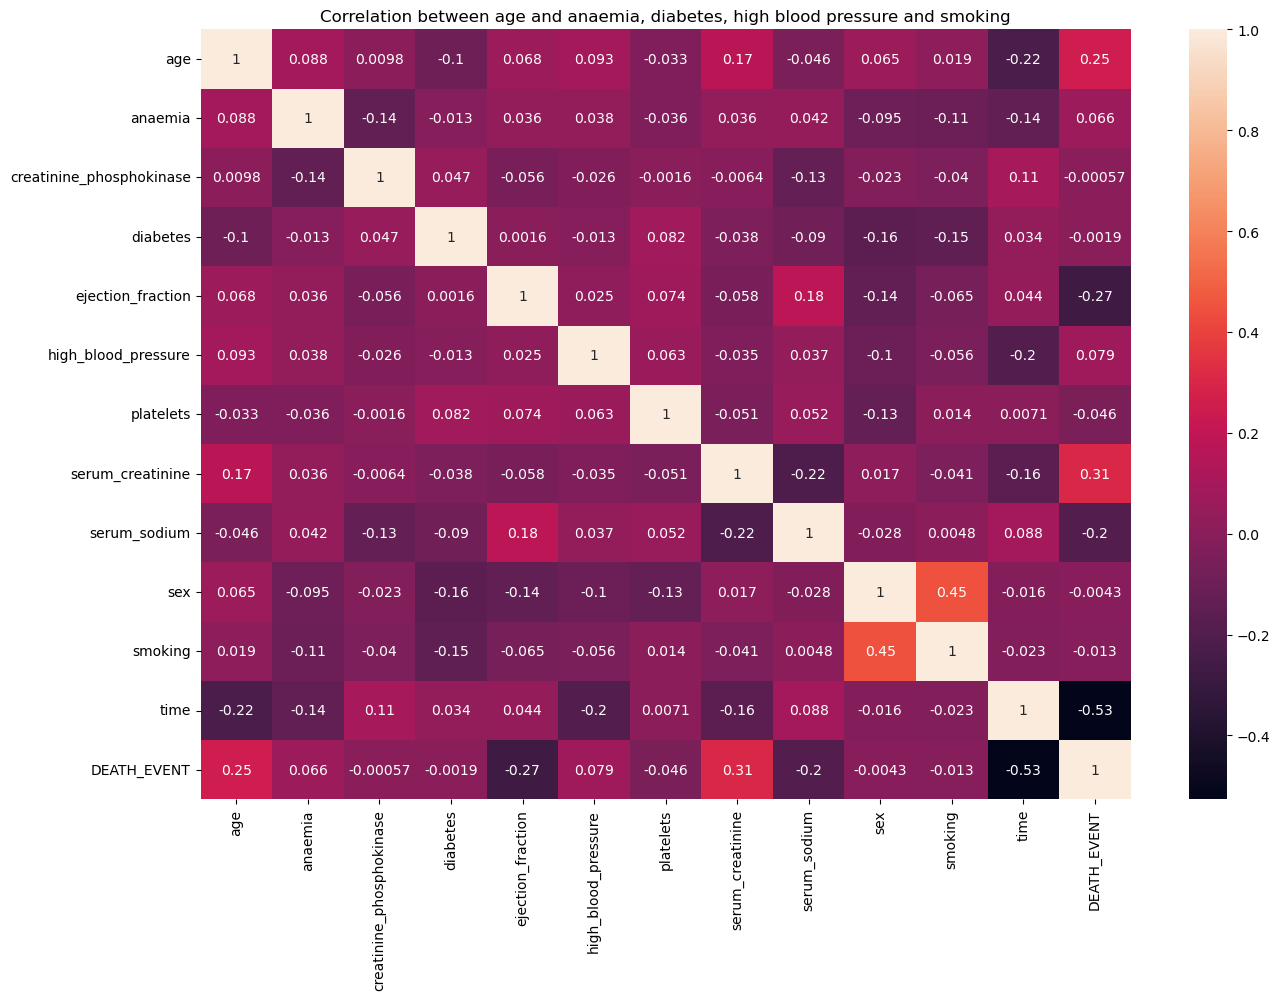

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between age and anaemia, diabetes, high blood pressure and smoking')
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
# #SCALING
# scaler=StandardScaler()
X=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT'].values

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. موازنة بيانات التدريب فقط
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 3. Scaling
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [34]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=2, min_samples_leaf=1, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', class_weight='balanced'),
    'SVM': SVC(class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
}

In [35]:
results = {}

for name, model in models.items():

    model.fit(X_train_bal_scaled,y_train_bal)
    y_pred= model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("*********************************************************\n")

Logistic Regression Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        61
           1       0.68      0.72      0.70        29

    accuracy                           0.80        90
   macro avg       0.77      0.78      0.77        90
weighted avg       0.80      0.80      0.80        90

*********************************************************

KNN Accuracy: 0.7667
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        61
           1       0.62      0.72      0.67        29

    accuracy                           0.77        90
   macro avg       0.74      0.76      0.74        90
weighted avg       0.78      0.77      0.77        90

*********************************************************

Random Forest Accuracy: 0.8667
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        61
           1       0.77      0

In [36]:
model = keras.Sequential()
model.add(keras.layers.Dense(32,  activation="relu", input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.3)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6644 - loss: 5165.2637 - val_accuracy: 0.7143 - val_loss: 1919.4872
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6781 - loss: 1303.1779 - val_accuracy: 0.2857 - val_loss: 1606.9890
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3356 - loss: 1467.1909 - val_accuracy: 0.7143 - val_loss: 295.3204
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6644 - loss: 580.9294 - val_accuracy: 0.7143 - val_loss: 926.1676
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6644 - loss: 998.0368 - val_accuracy: 0.7143 - val_loss: 490.1107
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6507 - loss: 372.0756 - val_accuracy: 0.2857 - val_loss: 913.2395
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3356 - loss: 821.5862 - val_accuracy: 0.7143 - val_loss: 278.1795
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6644 - loss: 548.445

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                          validation_split=0.3, callbacks=[early_stop], verbose=0)

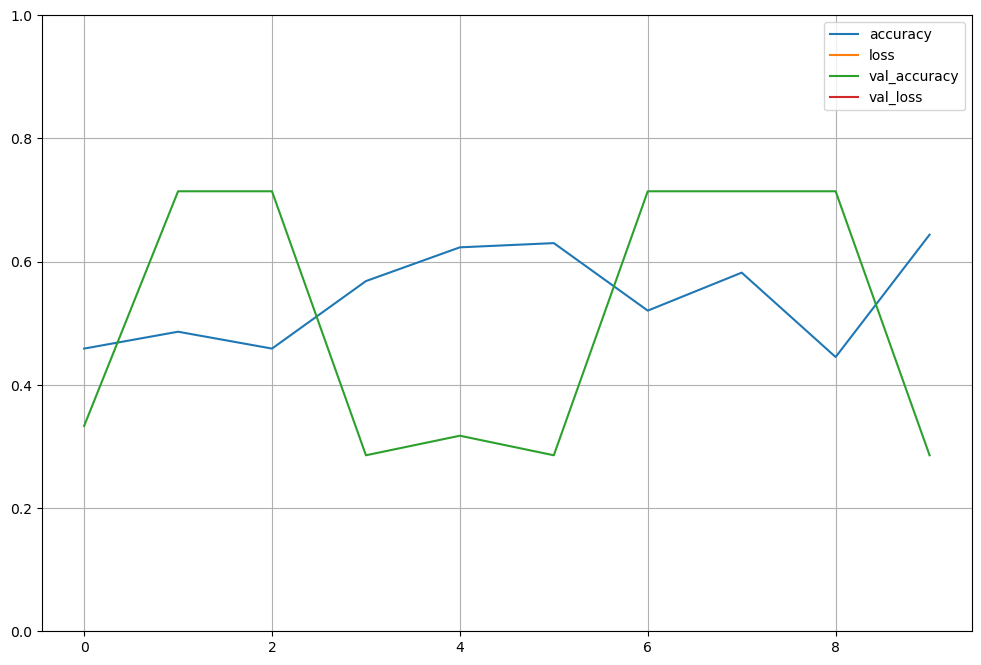

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3556 - loss: 29.5290 
Loss     :  29.528982162475586
accuracy :  0.35555556416511536


In [40]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

In [41]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Keras Neural Network Accuracy: {acc:.4f}")
results['Keras Neural Network'] = acc

Keras Neural Network Accuracy: 0.3556


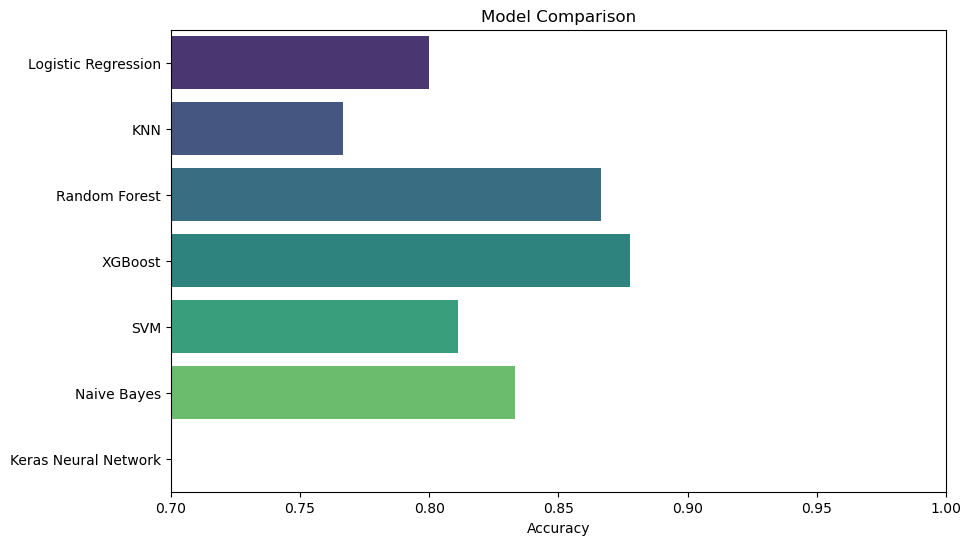

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=list(results.values()),
    y=list(results.keys()),
    orient="h",
    palette='viridis'
)
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.xlim(0.7, 1.0)
plt.show()

In [45]:
import joblib

#Assuming you've already trained this
model = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=2, min_samples_leaf=1, random_state=42, class_weight='balanced')
model.fit(X_train_bal_scaled, y_train_bal)

joblib.dump(model, 'random_forest_model2.pkl')

['random_forest_model2.pkl']

In [54]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
186,50.0,0,582.0,0,50.0,0,153000.0,0.6,134,0,0,172
258,45.0,1,66.0,1,25.0,0,233000.0,0.8,135,1,0,230
104,60.0,0,53.0,0,50.0,1,286000.0,2.3,143,0,0,87
161,45.0,1,130.0,0,35.0,0,174000.0,0.8,139,1,1,121
263,68.0,1,157.0,1,60.0,0,208000.0,1.0,140,0,0,237


In [55]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])